# Spike Challenge - Predicción de precios de insumos básicos en Chile

## PREGUNTA 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

In [2]:
import seaborn as sns

In [3]:
precipitaciones = pd.read_csv("precipitaciones.csv")
banco = pd.read_csv("banco_central.csv", thousands='.')

## PREGUNTA 2

Análisis exploratorio de "precipitaciones"

In [4]:
precipitaciones.info()
precipitaciones.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 496 non-null    object 
 1   Coquimbo                             496 non-null    float64
 2   Valparaiso                           496 non-null    float64
 3   Metropolitana_de_Santiago            496 non-null    float64
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64
 5   Maule                                496 non-null    float64
 6   Biobio                               496 non-null    float64
 7   La_Araucania                         496 non-null    float64
 8   Los_Rios                             496 non-null    float64
dtypes: float64(8), object(1)
memory usage: 35.0+ KB


,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [5]:
precipitaciones.isnull().sum()

date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

De este resultado se puede observar que no existen datos nulos en el dataset.

In [7]:
precipitaciones["date"].min()

'1979-01-01'

In [8]:
precipitaciones["date"].max()

'2020-04-01'

El dataset de precipitaciones contiene datos desde enero 1979 hasta abril 2020. 

Análisis exploratiorio de "banco"

In [9]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    float64
 2   Imacec_produccion_de_bienes                                                         300 non-null    float64
 3   Imacec_minero                                                                       300 non-null    float64
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

In [10]:
banco.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102796218.0,10546824.0,978554365.0,102.297.537,114994919.0,110729395.0,100064328.0,103163651.0,103405852.0,...,865903468.0,102761705.0,98915705.0,NaN,108387837.0,580480672.0,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101664842.0,999272757.0,927333293.0,104.485.589,102199311.0,106098291.0,102600107.0,101937319.0,102766884.0,...,867806065.0,968087179.0,914276663.0,NaN,104545429.0,544815032.0,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101642954.0,993959922.0,96133164.0,105.445.361,968789055.0,100462117.0,104083216.0,101953299.0,102322796.0,...,878030947.0,978471874.0,966913278.0,NaN,99468801.0,56891916.0,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998310201.0,968367884.0,102400933.0,999.212.106,89190493.0,939504414.0,103857161.0,100222381.0,995139235.0,...,913180348.0,966647135.0,981820974.0,NaN,94969678.0,56594867.0,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964696194.0,961051418.0,980029022.0,100.882.112,901785886.0,92776599.0,969309272.0,962069134.0,962804305.0,...,909263447.0,100100749.0,990198382.0,NaN,102128977.0,586329899.0,NaN,NaN,NaN,31736.0


In [11]:
banco.isnull().sum()

Periodo                                              0
Imacec_empalmado                                   314
Imacec_produccion_de_bienes                        314
Imacec_minero                                      314
Imacec_industria                                   313
                                                  ... 
Generacion_de_energia_electrica_CDEC_GWh           350
Indice_de_ventas_comercio_real_IVCM                530
Indice_de_ventas_comercio_real_no_durables_IVCM    530
Indice_de_ventas_comercio_real_durables_IVCM       529
Ventas_autos_nuevos                                469
Length: 85, dtype: int64

De este primer análisis se extraen dos situaciones: existen valores NaN presentes en el conjunto de datos, y el separador de miles es '.'. Para no entorpecer el modelo y trabajar con el mismo format de números, se soluciona la primera situación rellenando estas celdas vacías, y se especifica (al momento de importar el dataset) el tipo de separador de miles. Dado que las columnas hacen referencia a valores de índices dentro de cierto tiempo, se rellenan estos valores con el último registro para esa columna.

In [13]:
banco["Periodo"].min()

'1970-01-01 00:00:00 UTC'

In [14]:
banco["Periodo"].max()

'2020-13-01 00:00:00 UTC'

In [16]:
banco["Periodo"].describe()

count                         614
unique                        612
top       2018-08-01 00:00:00 UTC
freq                            2
Name: Periodo, dtype: object

In [17]:
banco["Periodo"].value_counts().head()

2018-08-01 00:00:00 UTC    2
2019-08-01 00:00:00 UTC    2
2009-04-01 00:00:00 UTC    1
1977-01-01 00:00:00 UTC    1
2004-04-01 00:00:00 UTC    1
Name: Periodo, dtype: int64

El dataset del banco central contiene datos desde enero 1970, pero se ve que también contiene un mes número "13" para la fecha 2020-13-01, el cual no existe y hay que cambiar manualmente, y que dos fechas se repiten (2018-08 y 2019-08). Además, hay muchos valores nulos para ciertas variables, lo que hay que tener en consideración.

In [22]:
banco.drop_duplicates(subset=["Periodo"], keep="first", inplace=True)
banco["Periodo"].replace("2020-13-01 00:00:00 UTC", "2020-12-01 00:00:00 UTC", inplace=True)

In [24]:
banco["Periodo"] = pd.to_datetime(banco["Periodo"])

In [25]:
for i in banco.columns:
    if banco[i].dtype == object and i != 'Periodo':
        banco[i] = banco[i].fillna('a').apply(lambda x: int(str(x).replace('.','')) if x not in list('abcdefghijklmnopqrstuvvwxyz') else None)
    if i != 'Periodo':
        banco[i] = banco[i].fillna(method='ffill')

In [26]:
banco.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
count,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,6.120000e+02,...,6.120000e+02,6.120000e+02,6.120000e+02,6.020000e+02,6.120000e+02,6.120000e+02,6.020000e+02,6.020000e+02,6.020000e+02,612.000000
mean,7.116405e+08,7.938285e+08,7.532772e+08,7.715454e+08,3.285447e+08,7.159719e+08,6.537911e+08,7.076623e+08,7.027859e+08,5.386561e+08,...,6.930387e+08,8.539628e+08,7.121841e+08,3.528862e+07,7.496510e+08,4.703563e+08,1.500170e+08,1.463586e+08,1.808401e+08,28769.580065
std,2.983248e+08,2.984038e+08,2.847287e+08,2.838141e+08,3.126439e+08,3.217437e+08,2.977619e+08,3.030888e+08,3.055132e+08,1.710759e+08,...,3.511284e+08,2.363106e+08,2.861302e+08,1.208007e+08,3.315502e+08,1.522135e+08,1.549355e+08,1.633558e+08,1.509046e+08,3741.688422
min,5.296994e+06,1.014872e+06,1.010200e+07,1.032193e+06,1.027326e+06,4.237199e+06,7.563720e+05,9.371354e+06,9.043380e+05,1.586778e+07,...,1.094737e+06,1.000880e+07,9.475840e+05,1.023349e+07,7.480450e+05,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,4658.000000
25%,5.752406e+08,7.624112e+08,8.571518e+08,7.480330e+08,1.101414e+08,4.529465e+08,4.822143e+08,5.838112e+08,5.347081e+08,6.221493e+08,...,1.155849e+08,9.246861e+08,6.170189e+08,1.023349e+07,6.433476e+08,4.703889e+08,1.222393e+08,1.142655e+08,1.558969e+08,29486.000000
50%,9.053597e+08,9.653279e+08,8.571518e+08,9.194709e+08,1.101414e+08,9.575205e+08,8.555786e+08,9.071512e+08,9.113080e+08,6.221493e+08,...,8.770599e+08,9.246861e+08,8.689316e+08,1.023349e+07,9.401512e+08,5.324482e+08,1.222393e+08,1.142655e+08,1.558969e+08,29486.000000
75%,9.053597e+08,9.653279e+08,8.571719e+08,9.194709e+08,6.246492e+08,9.575205e+08,8.555786e+08,9.071512e+08,9.113080e+08,6.221493e+08,...,9.099964e+08,9.246861e+08,8.689316e+08,1.023349e+07,9.918387e+08,5.324482e+08,1.222393e+08,1.142655e+08,1.558969e+08,29486.000000
max,9.998748e+08,9.992728e+08,9.975769e+08,9.992121e+08,9.995847e+08,9.971810e+08,9.964286e+08,9.981539e+08,9.972512e+08,7.046145e+08,...,9.987790e+08,9.996066e+08,9.994139e+08,9.991563e+08,9.999838e+08,6.684895e+08,9.996093e+08,9.986254e+08,9.988942e+08,39263.000000


## PREGUNTA 3

In [27]:
def plot_precipitaciones_region(region, fecha_inicial, fecha_final):
    if region in list(precipitaciones.columns):
        if fecha_inicial < fecha_final:
            if fecha_inicial in list(precipitaciones["date"]):
                if fecha_final in list(precipitaciones["date"]):
                    datos_region_completa = precipitaciones[["date", region]] ##extraigo como dataframe todos los datos para la región
                    datos_region_completa = datos_region_completa.sort_values("date", ascending=True) ##ordeno las fechas en orden cronológico
                    datos_region = datos_region_completa[(datos_region_completa["date"] >= fecha_inicial) & (datos_region_completa["date"] <= fecha_final)] ##extraigo los datos para el rango de fechas

                    fig, ax = plt.subplots(figsize=(70, 20))
                    ax.bar(datos_region["date"], datos_region[region], color="blue")
                    ax.set(xlabel="Fecha", xlim=[fecha_inicial, fecha_final])
                    ax.set_ylabel("Precipitación (mm)", fontsize=40)
                    ax.set_title(f"Precipitación para región {region} entre las fechas {fecha_inicial} y {fecha_final}", fontsize=60)
                    ax.tick_params(axis='y', labelsize=40)
                    fig.autofmt_xdate(rotation=90)
                    plt.show()
                else:
                    print("Error: la fecha final indicada no se encuentra dentro del rango de fechas del dataset")
            else:
                print("Error: la fecha inicial indicada no se encuentra dentro del rango de fechas del dataset")
        else:
            print("Error: la fecha final debe ser posterior a la fecha inicial")
    else:
        print("Error: la región indicada no se encuentra dentro del dataset")


Precipitaciones para la región Libertador Bernardo O'Higgins

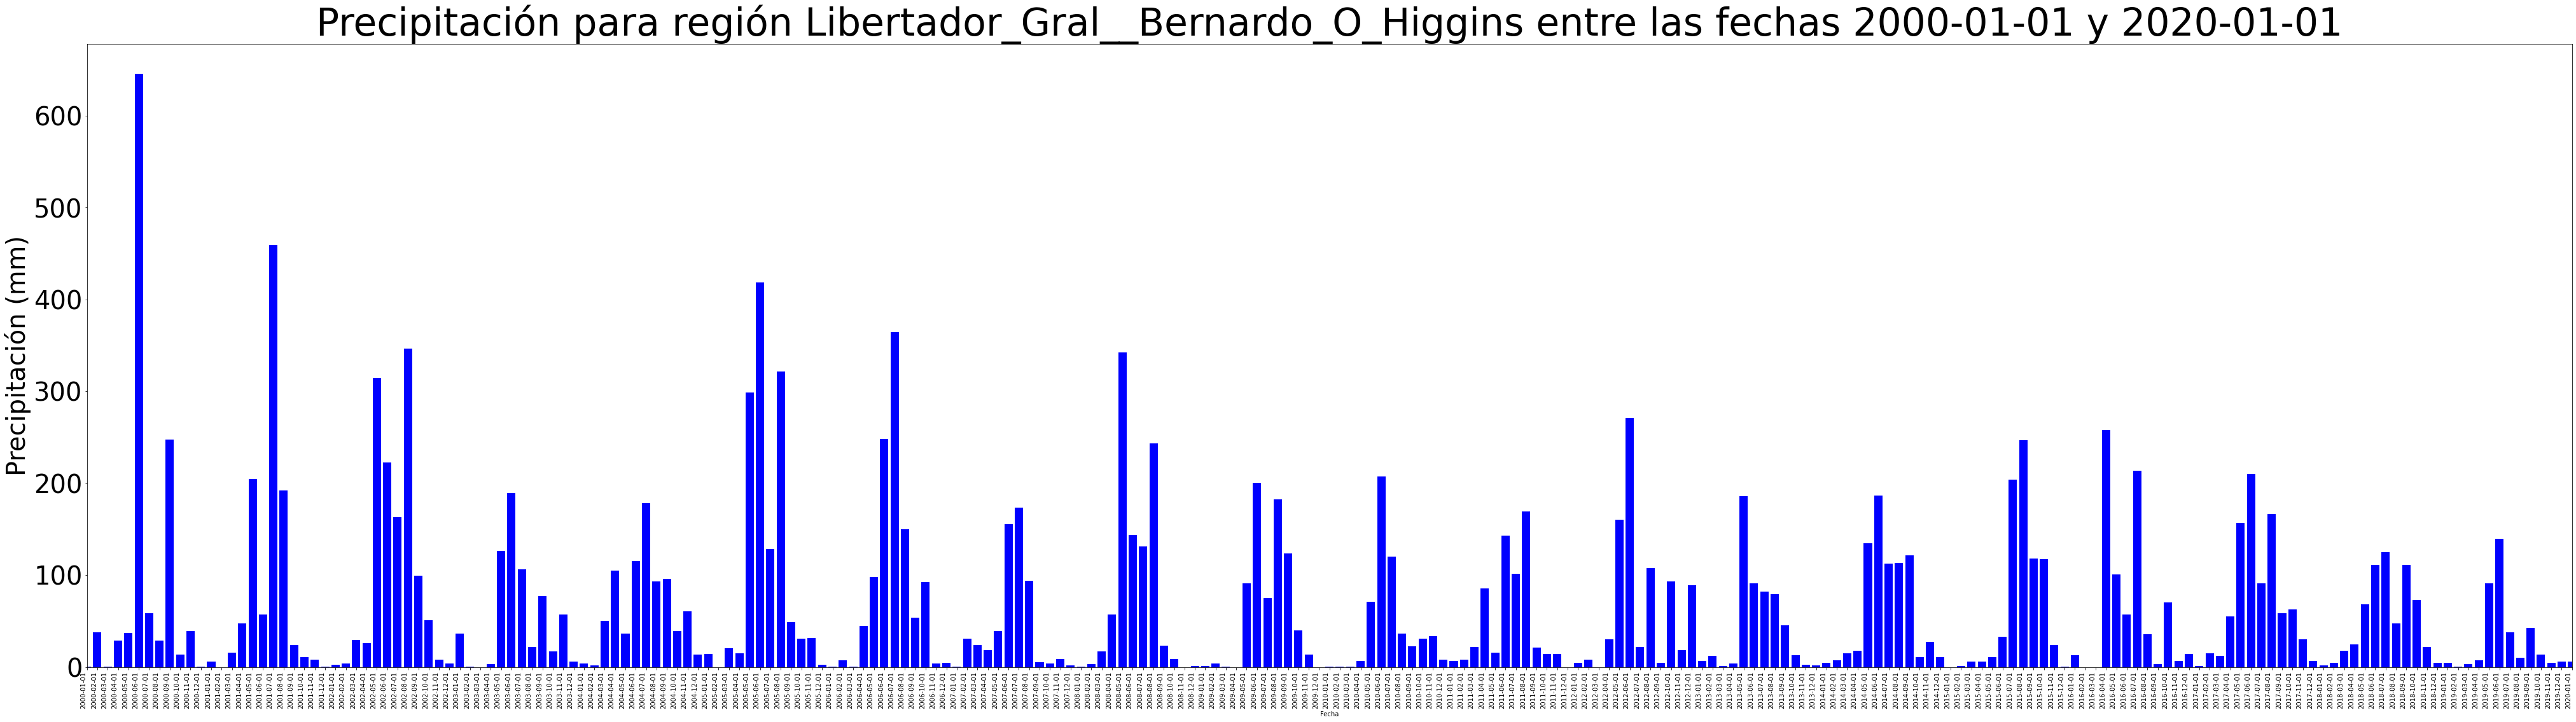

In [28]:
plot_precipitaciones_region("Libertador_Gral__Bernardo_O_Higgins", "2000-01-01", "2020-01-01")

Precipitaciones para la región Metropolitana de Santiago

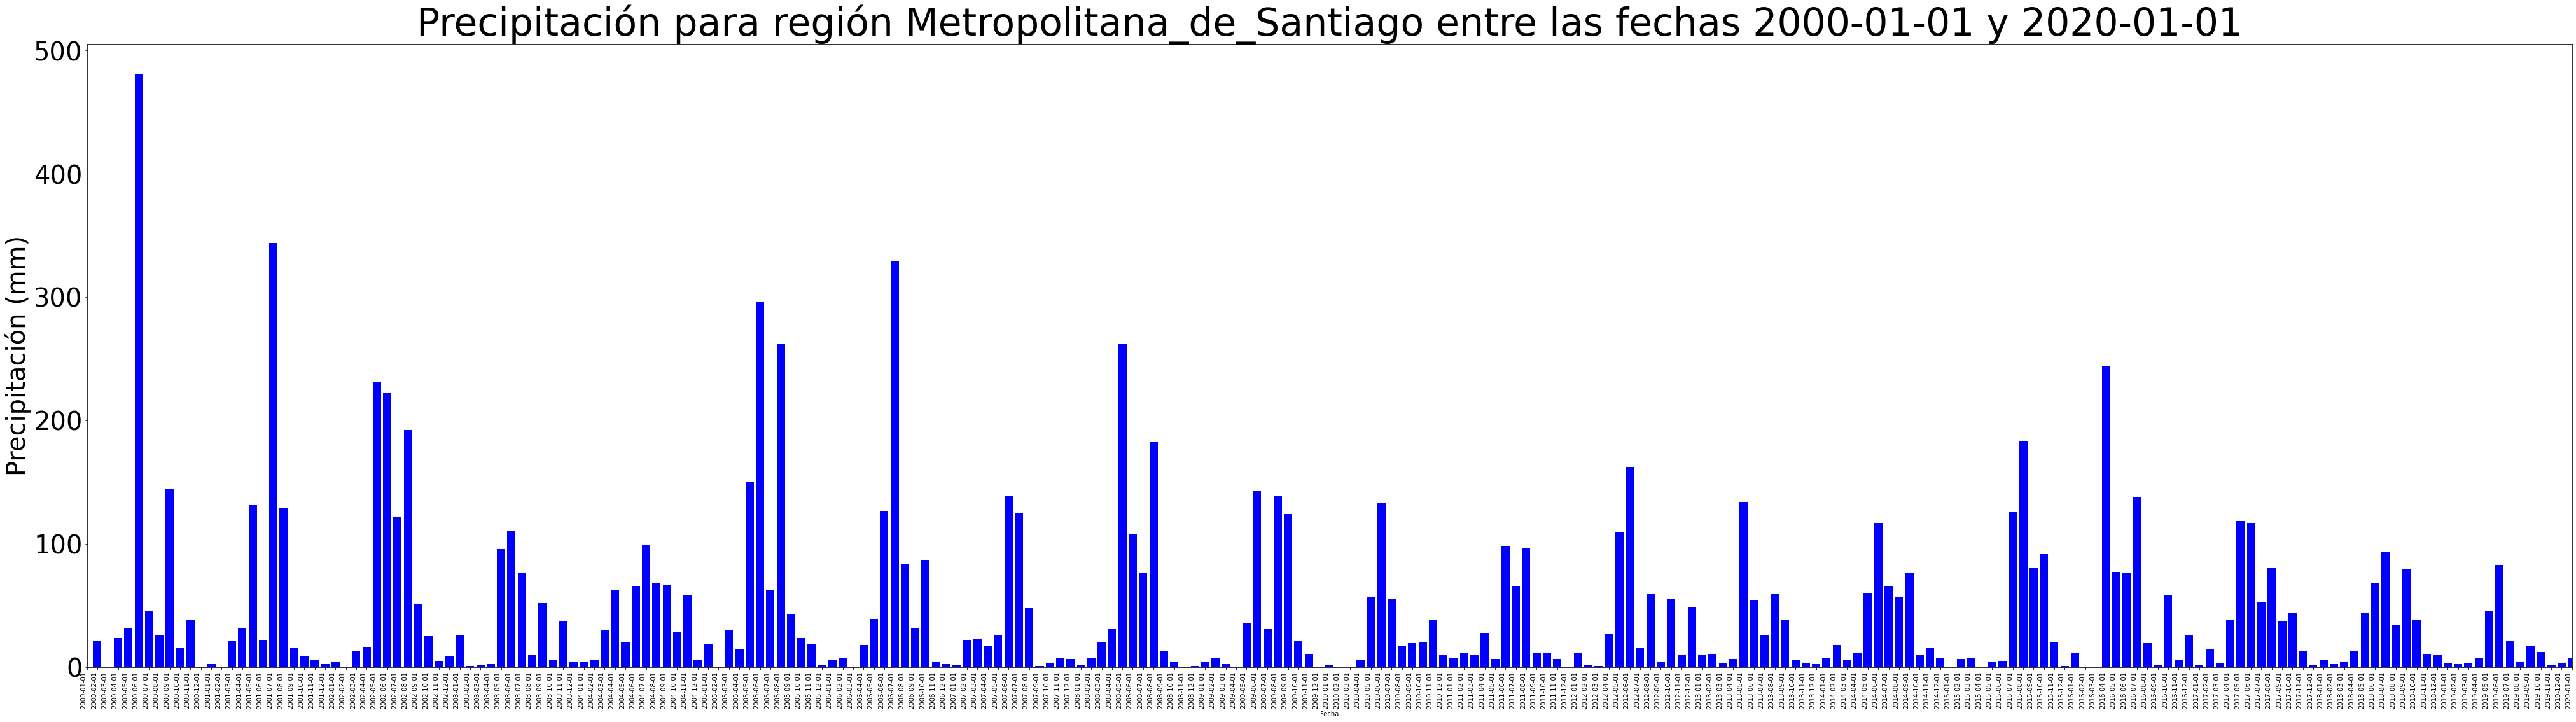

In [29]:
plot_precipitaciones_region("Metropolitana_de_Santiago", "2000-01-01", "2020-01-01")

De estos gráficos individuales se puede observar, en ambos, la estacionalidad de las precipitaciones para cada año (mayores precipitaciones en invierno que en verano). En ambos gráficos se presenta una disminución general de las precipitaciones a lo largo de los años, con la Región Metropolitana presentando menores valores que la primera región. Debido a la cercanía de estas zonas geográficas, y tal como se ilustra en los gráficos anteriores, era de esperar una similitud en las magnitudes y variación de las precipitaciones.

Para la función que grafique una serie de años sobre un mismo eje temporal de meses, es necesario extraer de la columna de fechas "date" la información en el formato adecuado, y agregarla al mismo dataset:

In [31]:
precipitaciones["date"] = pd.to_datetime(precipitaciones["date"])
precipitaciones["anio"] = precipitaciones["date"].dt.year 
precipitaciones["mes"] = precipitaciones["date"].dt.month

In [32]:
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,anio,mes
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010,1989,2
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041,1998,10
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098,2001,2
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488,2008,11
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235,2009,4


In [33]:
def plot_precipitaciones_anios(region, fechas):
    if region in list(precipitaciones.columns):
        for i in range(len(fechas)):
            datos_region_completa = precipitaciones[["date", "anio", "mes", region]] ##extraigo como dataframe todos los datos para la región
            datos_region_completa = datos_region_completa.sort_values("mes", ascending=True) ##ordeno las fechas en orden cronológico
            datos_region = datos_region_completa[datos_region_completa["anio"] == fechas[i]] ##extraigo los datos para el año

            fig, ax = plt.subplots(figsize=(70, 20))
            ax.bar(datos_region["mes"], datos_region[region], color="blue")
            ax.set_xlabel("Mes", fontsize=40)
            ax.set_ylabel("Precipitación (mm)", fontsize=40)
            ax.set_ylim([0, 600])
            ax.set_title(f"Precipitación para región {region} para el año {fechas[i]}", fontsize=60)
            ax.tick_params(axis='x', labelsize=40)
            ax.tick_params(axis='y', labelsize=40)
            fig.autofmt_xdate(rotation=90)
            plt.show()
                    
    else:
        print("Error: la región indicada no se encuentra dentro del dataset")

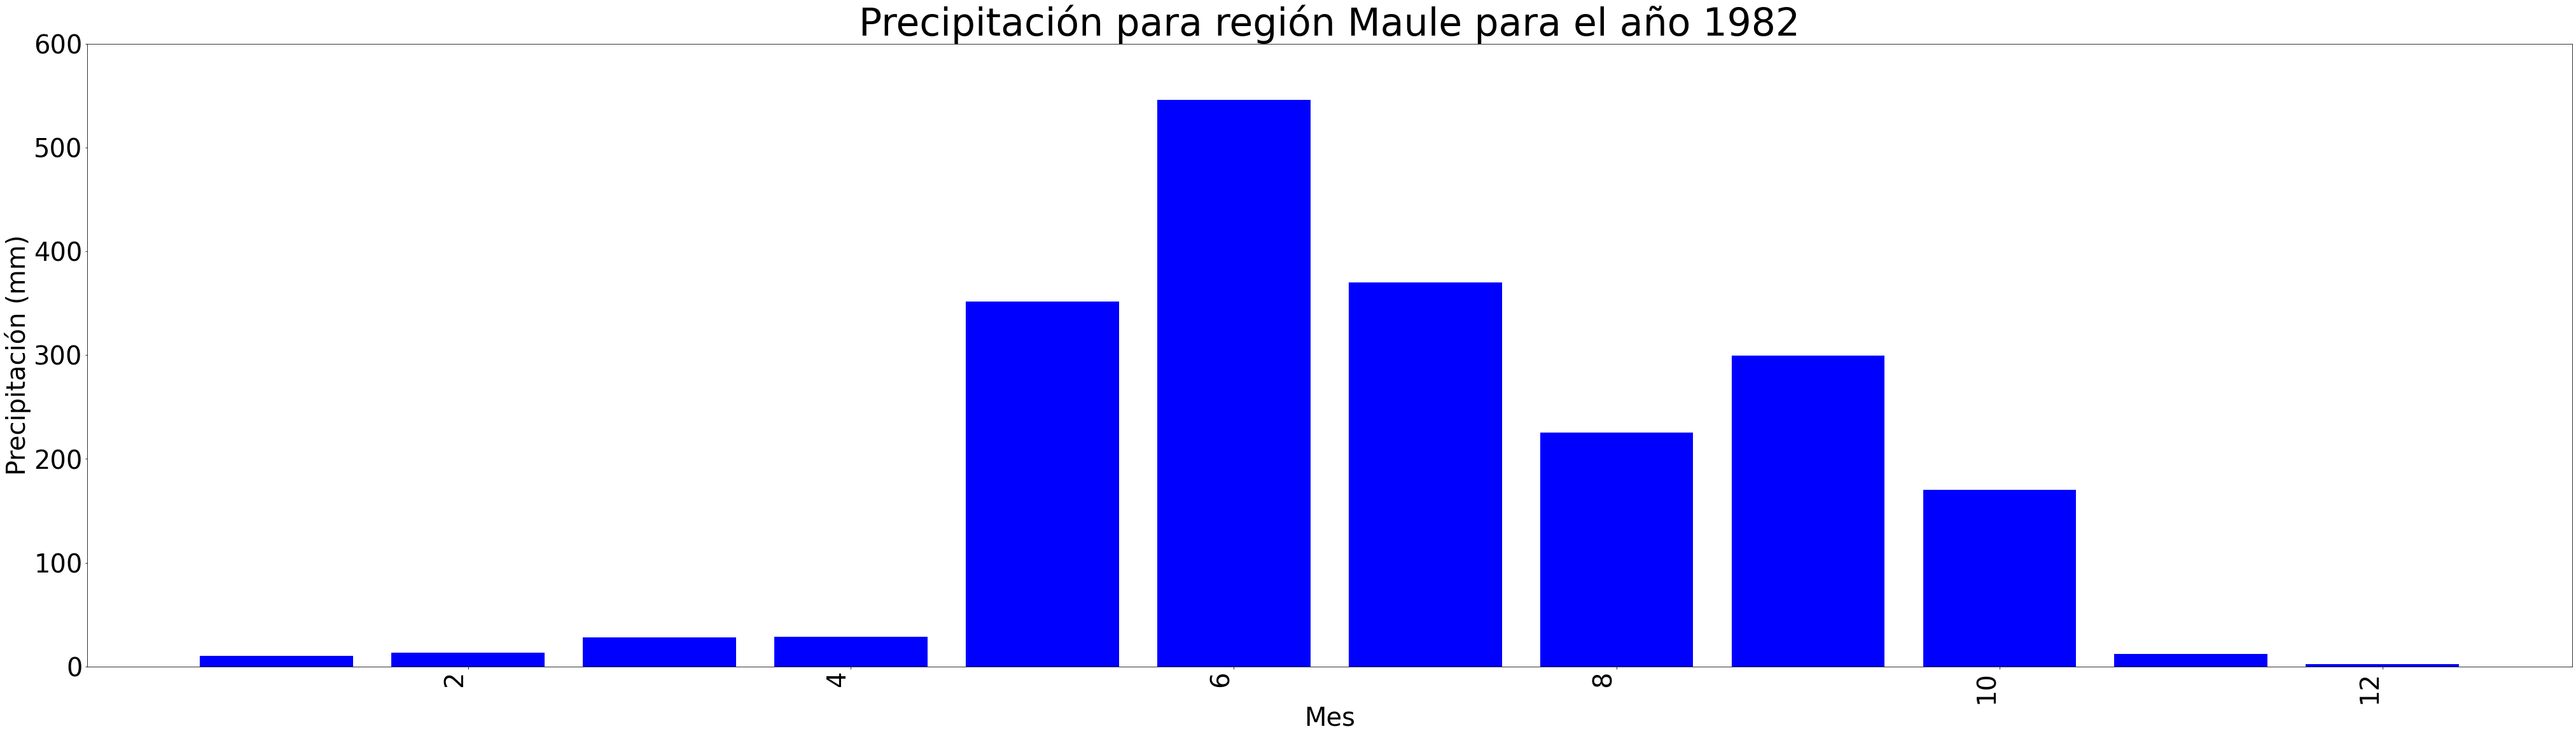

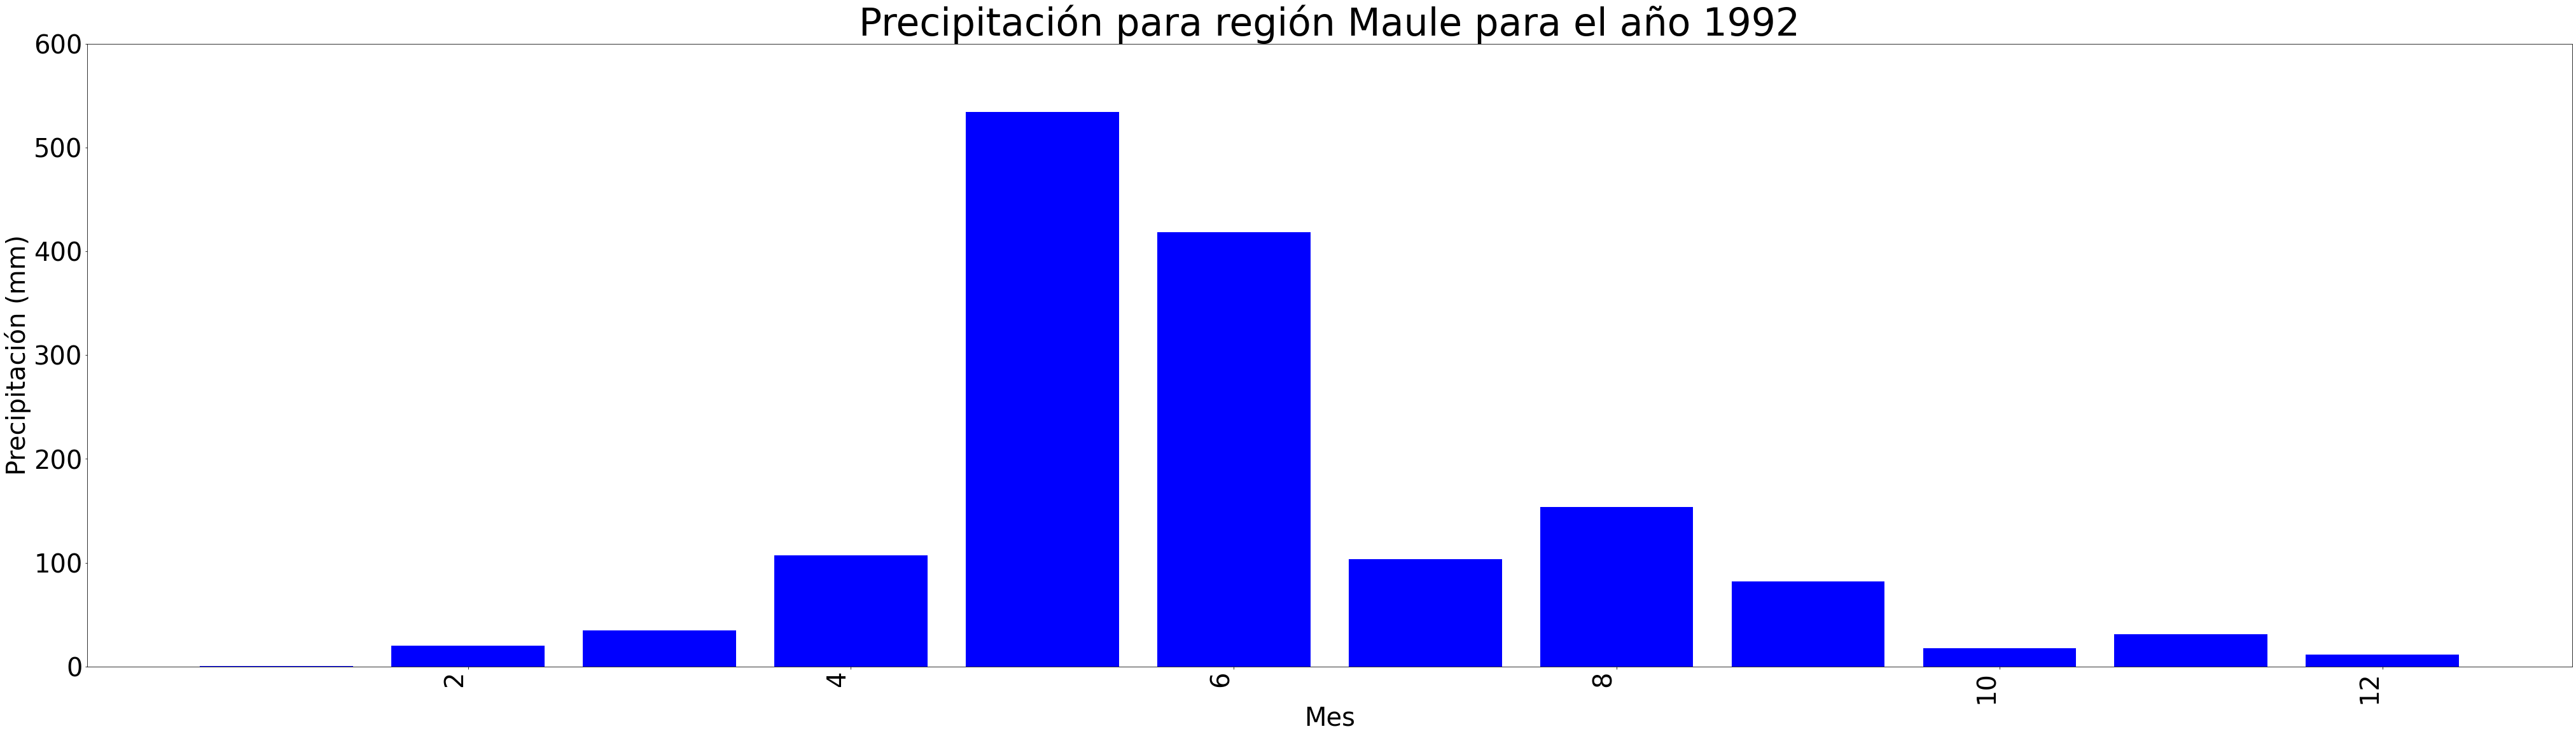

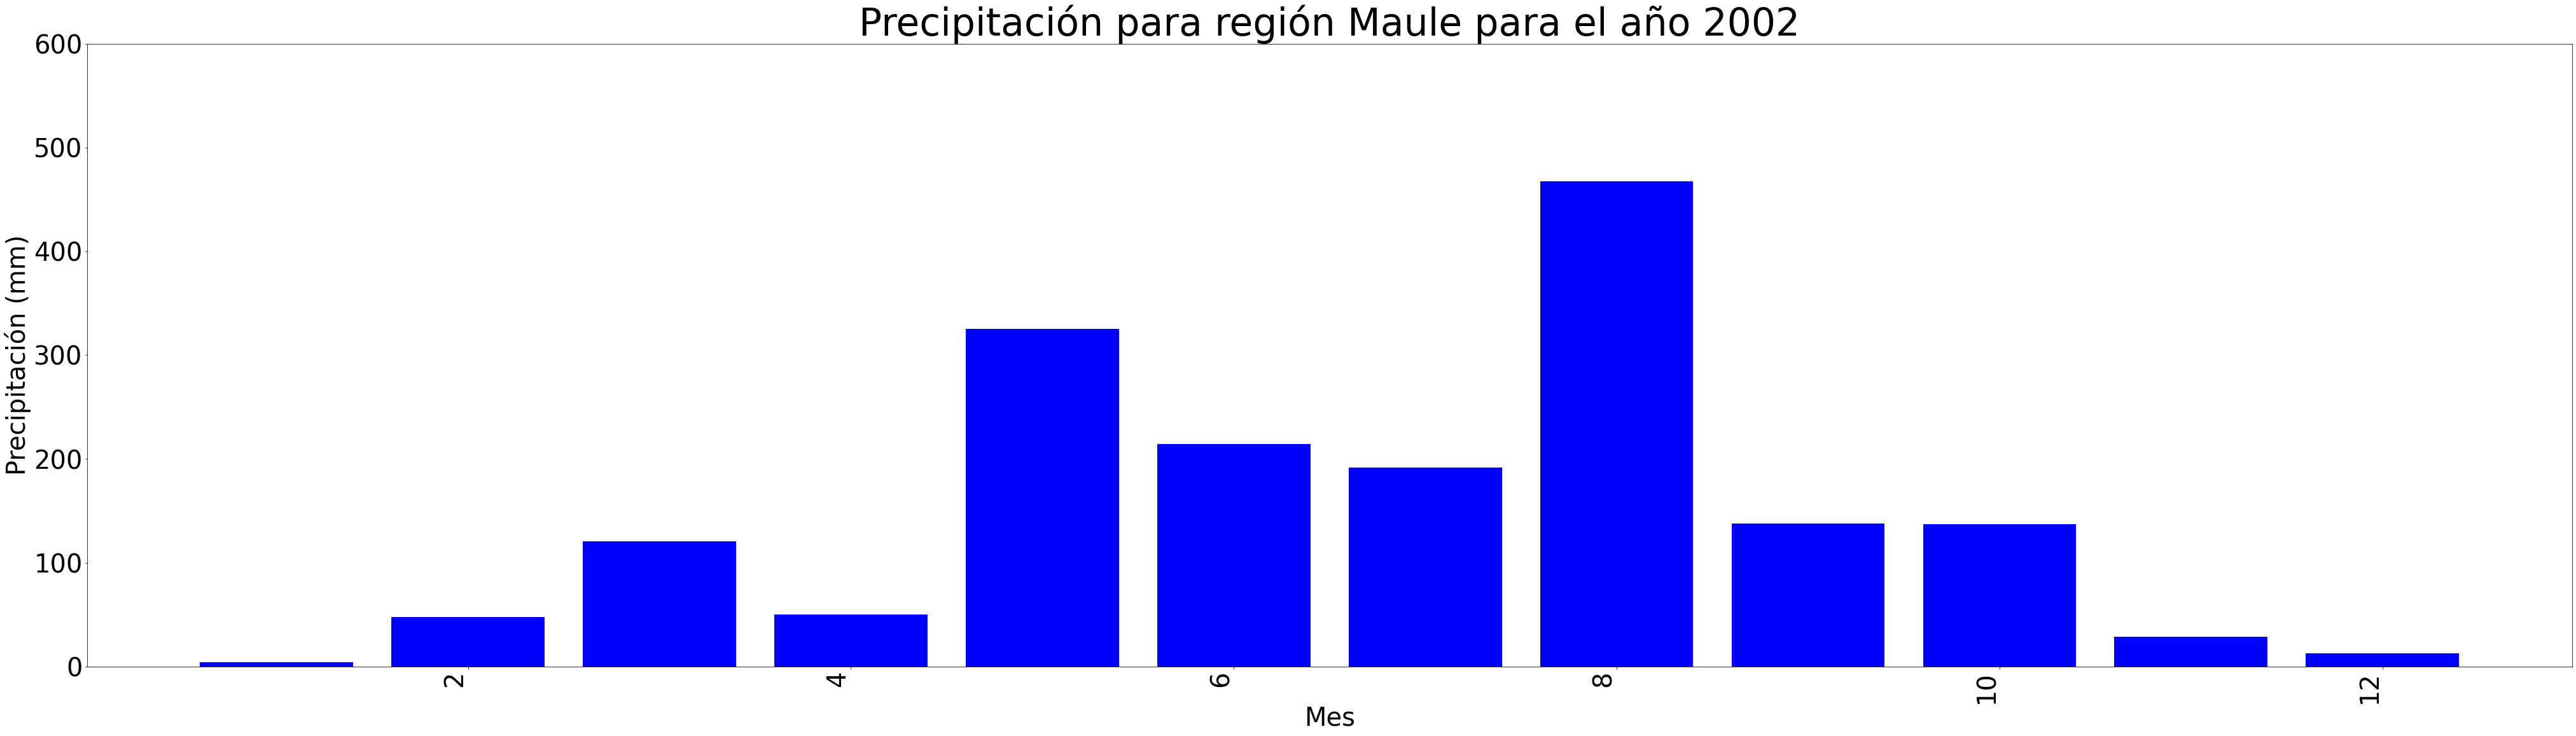

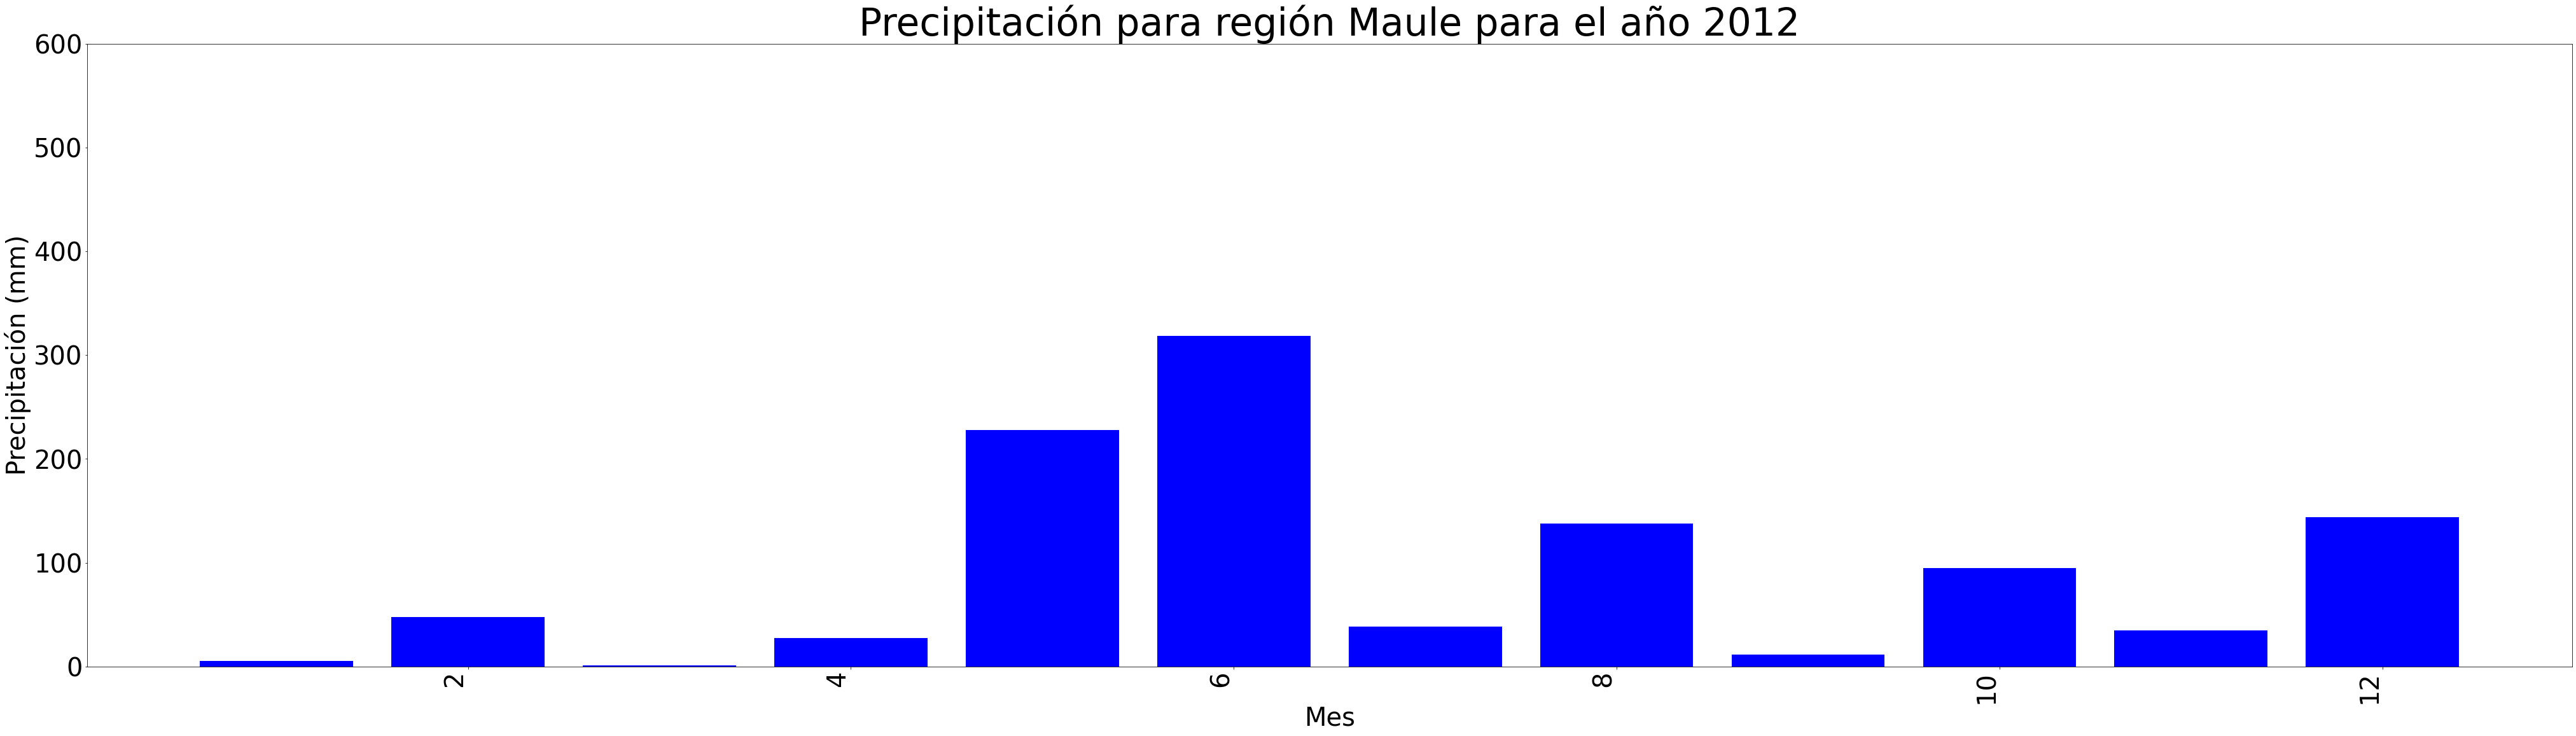

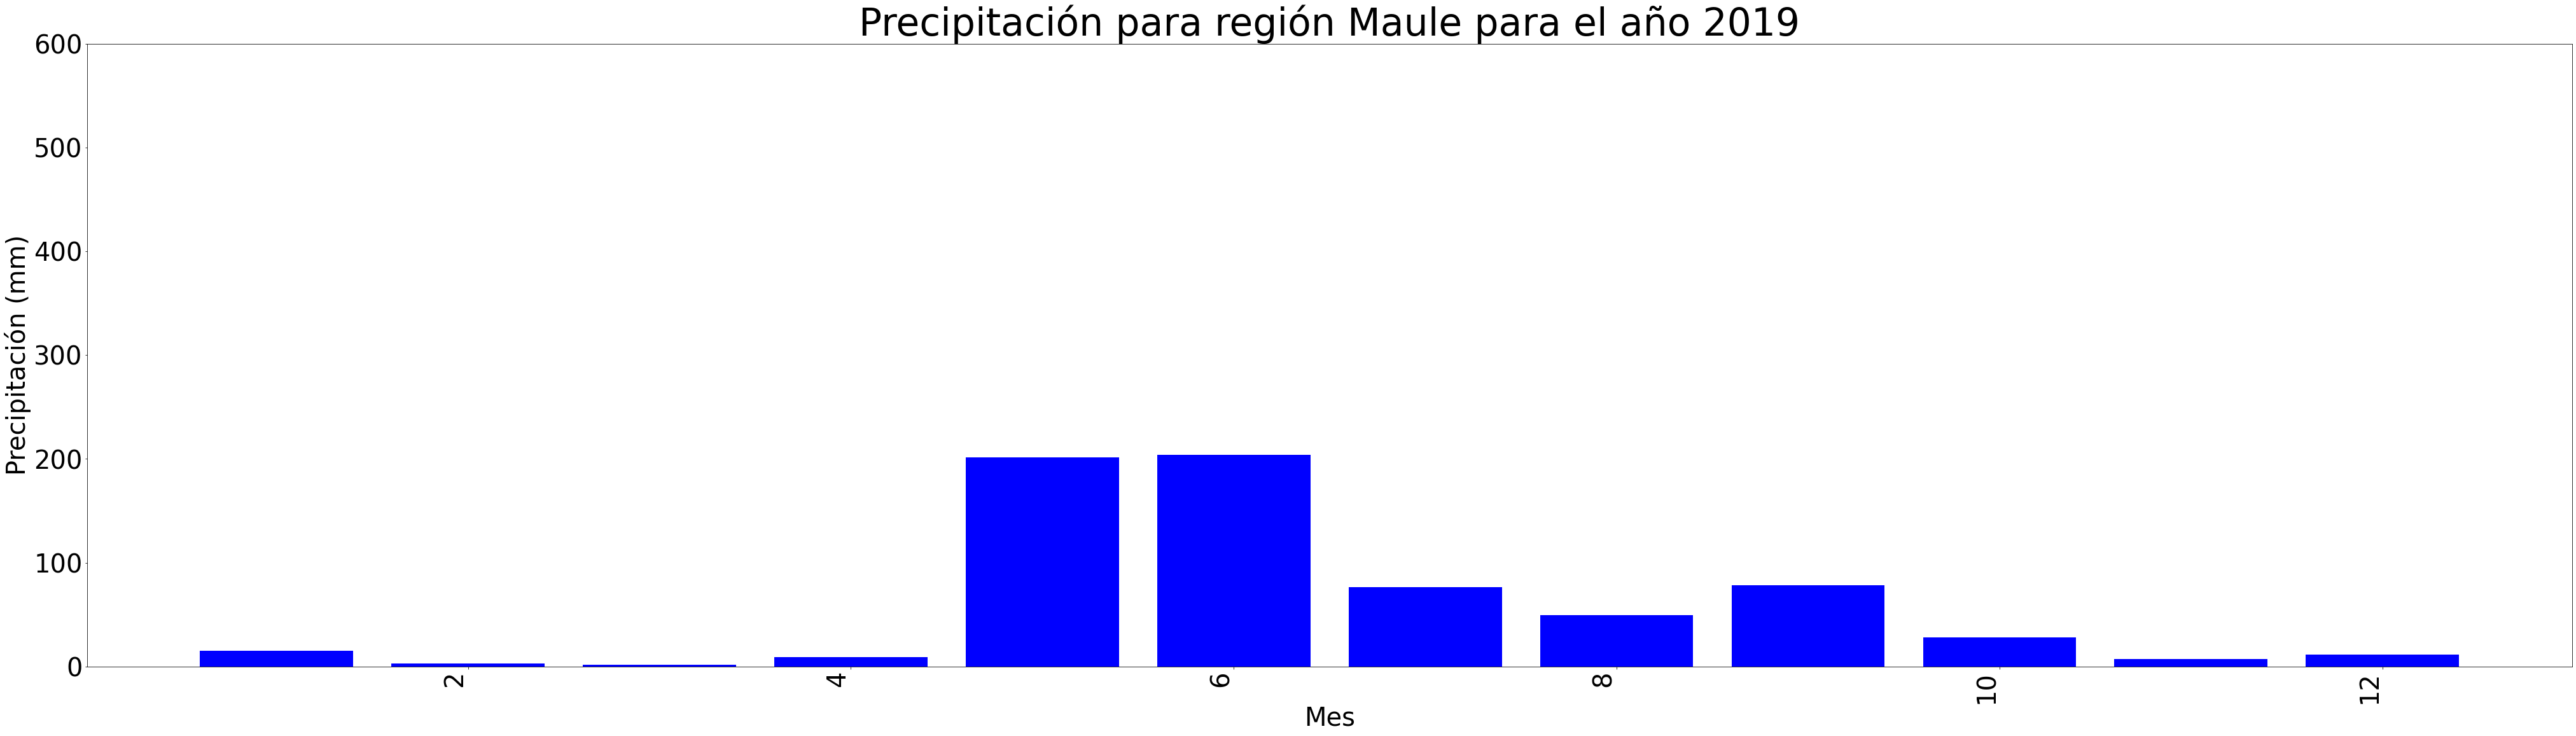

In [34]:
plot_precipitaciones_anios("Maule", [1982,1992,2002,2012,2019])

De manera visual se puede observar cómo los valores máximos de precipitación (en los meses de invierno) disminuyen a lo largo de los años. Entre 1982 y 2019, la máxima anual disminuye de 550 mm a 200 mm (aproximadamente), lo que equivale a una disminución del 60% aprox.

In [55]:
def plot_PIB(series, fecha_inicial):
    for serie in series:     
        if serie in list(banco.columns):
            datos_serie_completa = banco[["Periodo", serie]] ##extraigo como dataframe todos los datos para la serie
            datos_serie_completa = datos_serie_completa.sort_values("Periodo", ascending=True) ##ordeno las fechas en orden cronológico
            datos_serie = datos_serie_completa[(datos_serie_completa["Periodo"] >= fecha_inicial)] ##extraigo los datos para el rango de fechas

            fig, ax = plt.subplots(figsize=(70, 20))
            ax.plot(datos_serie["Periodo"], datos_serie[serie], color="blue")
            ax.set_xlabel("Fecha", fontsize=40)
            ax.set_ylabel("Valor", fontsize=40)
            ax.set_title(f"Valor de {serie} a partir de {fecha_inicial}", fontsize=60)
            ax.tick_params(axis='x', labelsize=40)
            ax.tick_params(axis='y', labelsize=40)
            fig.autofmt_xdate(rotation=90)
            plt.show()


        else:
            print("Error: la serie indicada no se encuentra dentro del dataset")

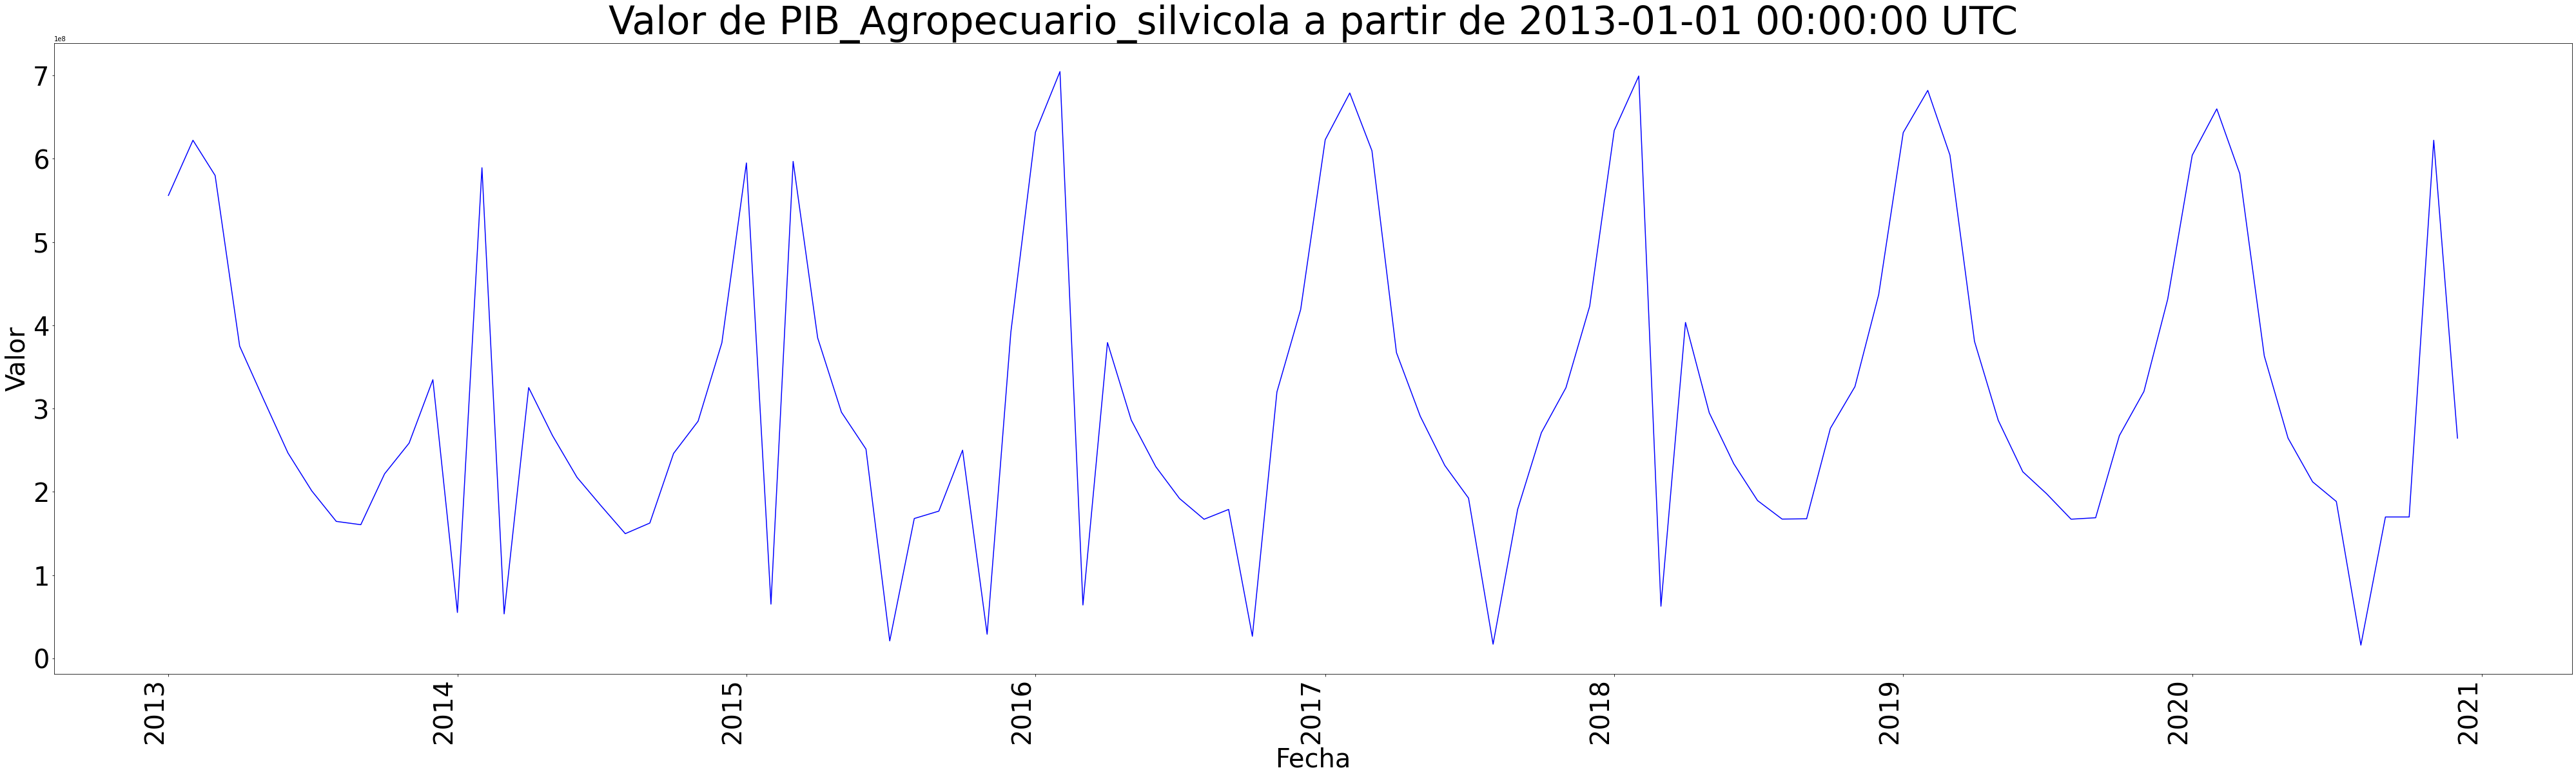

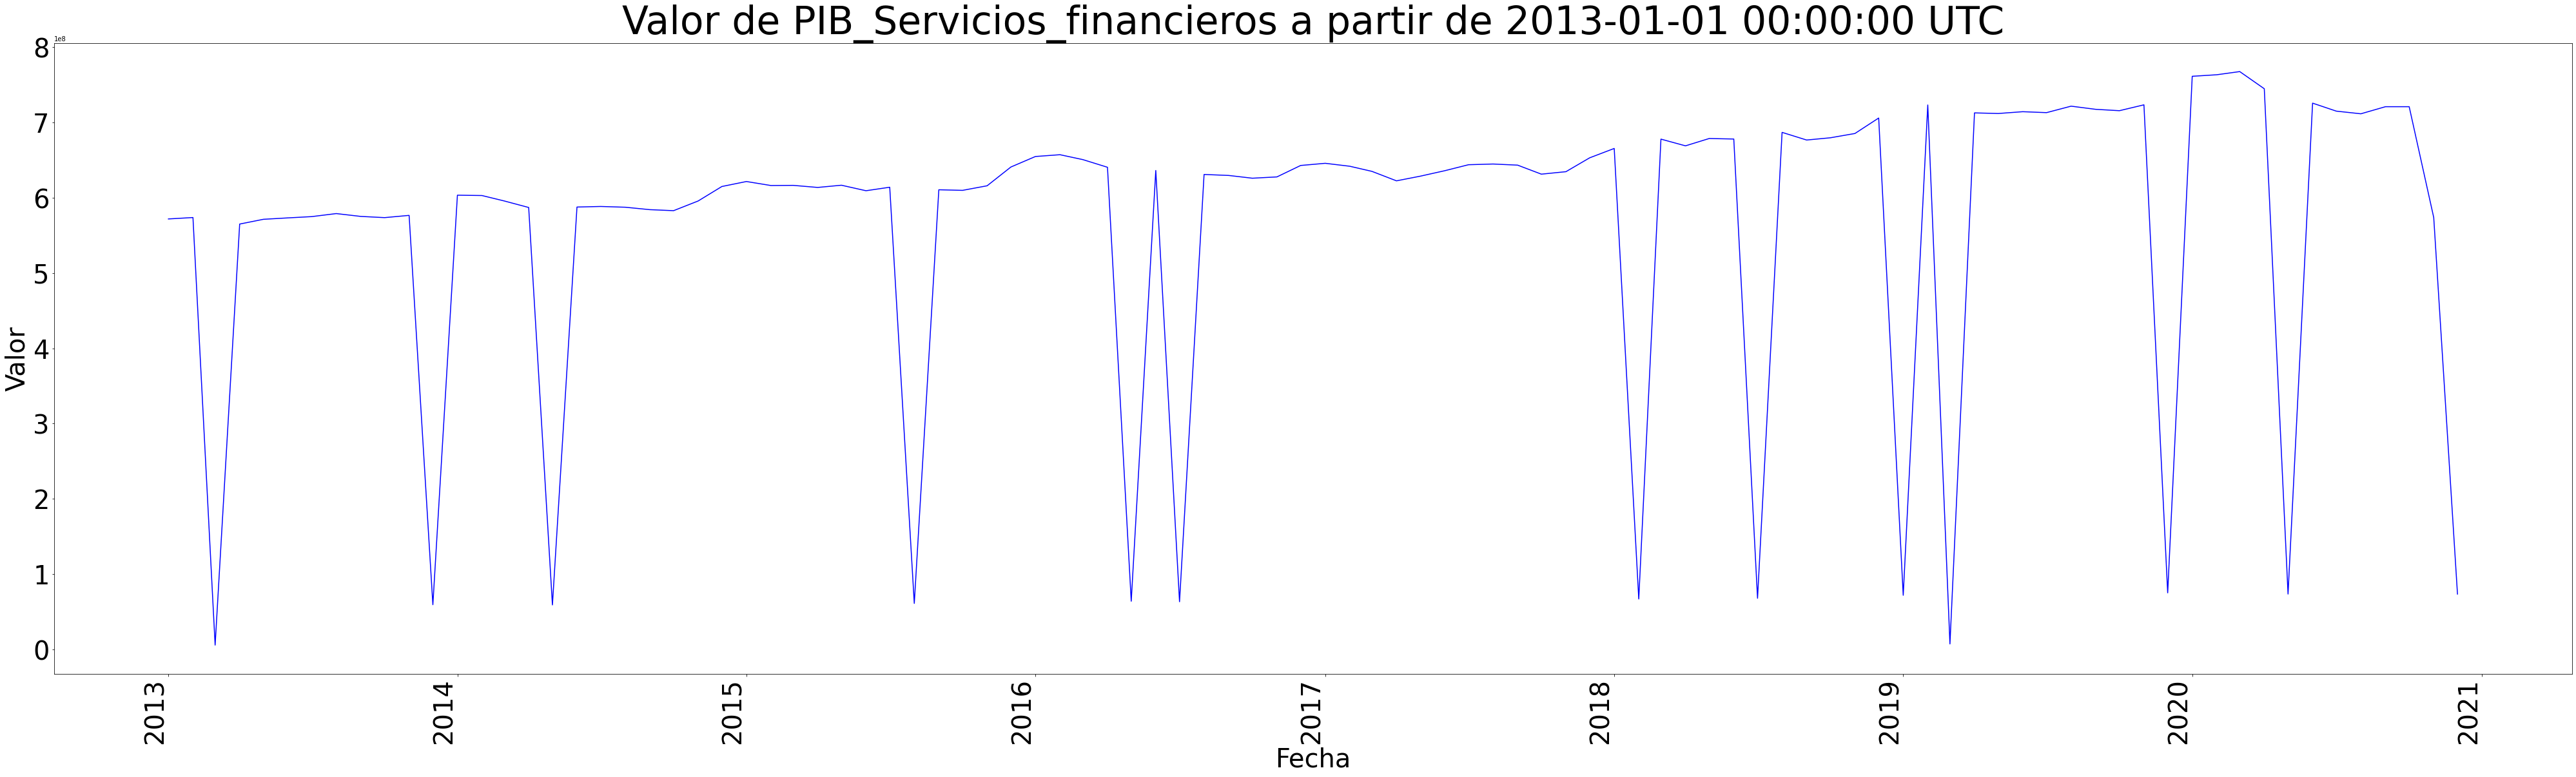

In [56]:
plot_PIB(["PIB_Agropecuario_silvicola", "PIB_Servicios_financieros"], "2013-01-01 00:00:00 UTC")

De estos gráficos se observa que estas dos series tienen comportamientos y tendencias distintas, pero se relacionan entre si. En general, el valor de PIB_Agropecuario_Silvicola tiene mas variación dentro de un mismo año, lo cual se podría atribuir a la estacionalidad de los recursos naturales asociados a su producción. Por otro lado, el valor de PIB_Servicios_financieros se mantiene mayoritariamente estable a lo largo de un año, con períodos de caída significativa pero con valores máximos crecientes. Es de esperar que este último indicador no varíe tanto anualmente, o estacionalmente, al no depender directamente de recursos naturales. De manera visual, podría predecirse una correlación inversa entre estas dos variables.

## PREGUNTA 4

Para correlacionar las distintas series de tiempo, podemos utilizar la librería numpy para evaluar el coeficiente de correlación entre ellas. Esta función de la librería evalúa el coeficiente de Pearson entre cada par de series. Se debe tener en cuenta que este método asume que los datasets no presentan outliers y que la tendencia entre las variables es lineal, por lo que si esto no se cumple se debería utilizar un método más robusto como otros tipos de correlación. Para efectos de este desafío, se utilizará la correlación de Pearson.

Si bien se deben utilizar variables cuya correlación sea "buena", lo cual puede traducirse en coeficientes de correlación superiores a 0.6 y menores a -0.6, utilizar únicamente variables altamente correlacionadas (valores muy cercanos a 1 o -1) puede llevar a obtener un modelo muy rígido, capaz de estimar valores adecuadamente pero poco flexible ante variaciones de las variables del modelo.

Existen distintas formas de evaluar la correlación de las variables. Una es mediante una matriz de correlaciones, o de manera visual mediante un heatmap.

Evaluando las series de la pregunta anterior:

In [57]:
print(np.corrcoef(banco['PIB_Agropecuario_silvicola'],banco['PIB_Servicios_financieros']))

[[ 1.         -0.29685383]
 [-0.29685383  1.        ]]


In [58]:
columnas = banco.select_dtypes(include=['float64', 'int'])
matriz_correlacion = columnas.corr(method="pearson")
matriz_correlacion.head()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
Imacec_empalmado,1.000000,0.639942,0.399985,0.607296,-0.303344,0.693582,0.699825,0.776647,0.799945,0.385526,...,-0.034433,0.549474,0.253461,-0.324224,0.519265,0.258489,-0.101076,-0.177039,-0.108697,-0.039498
Imacec_produccion_de_bienes,0.639942,1.000000,0.363399,0.578721,-0.131681,0.673281,0.553005,0.649531,0.628596,0.283855,...,-0.032605,0.579115,0.199454,-0.227823,0.512729,0.282592,-0.133929,-0.111663,-0.181291,0.005072
Imacec_minero,0.399985,0.363399,1.000000,0.406114,-0.265237,0.301472,0.392699,0.427431,0.468186,0.403616,...,0.045997,0.483465,0.341262,-0.218243,0.340075,0.264787,-0.164018,-0.133943,-0.145163,0.030392
Imacec_industria,0.607296,0.578721,0.406114,1.000000,-0.273721,0.573165,0.625856,0.576360,0.603090,0.368609,...,0.006581,0.622399,0.221835,-0.206717,0.544772,0.254853,-0.024619,-0.061317,-0.057548,-0.076571
Imacec_resto_de_bienes,-0.303344,-0.131681,-0.265237,-0.273721,1.000000,-0.392669,-0.405462,-0.279701,-0.382230,-0.375066,...,-0.035533,-0.003747,-0.062045,0.132525,-0.229777,-0.263482,0.131070,0.154204,0.069510,-0.212669


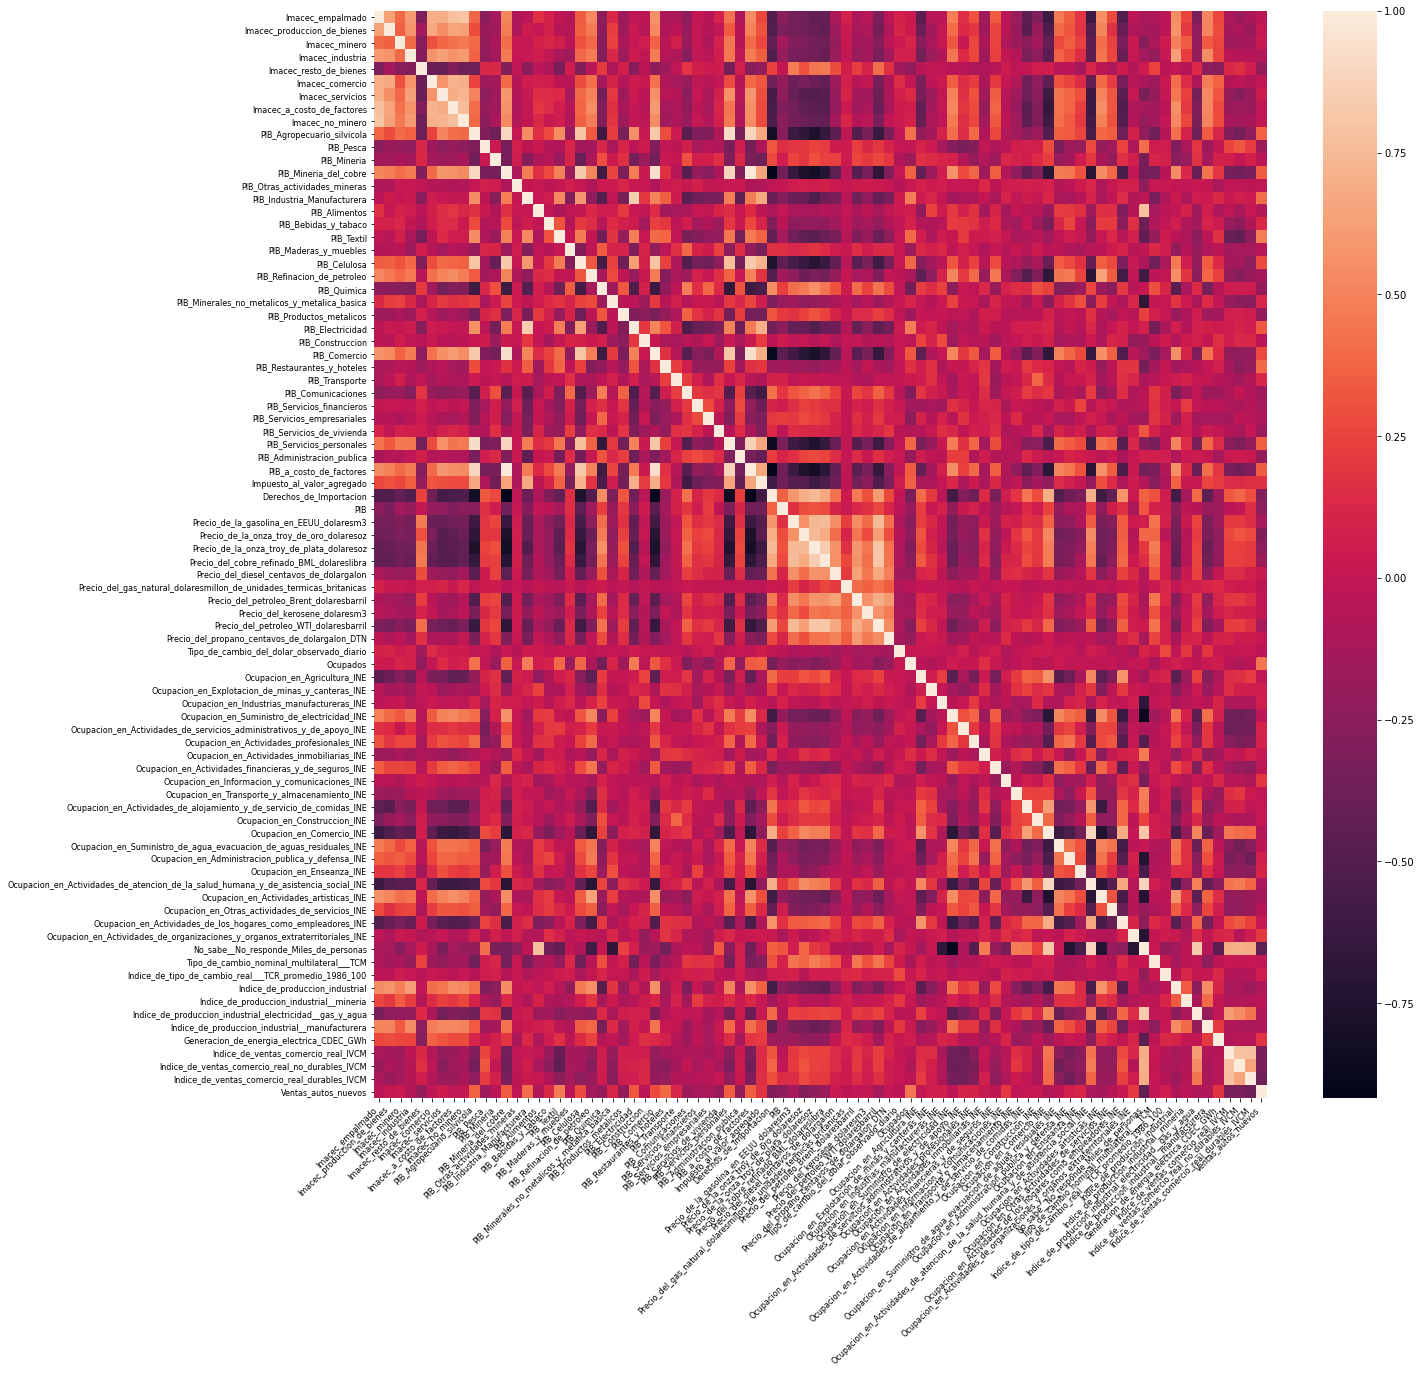

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(matriz_correlacion,annot= False,cbar= True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment = 'right')

ax.tick_params(labelsize = 8)

Debido a la gran cantidad de variables (series) de este dataset, no es muy útil utilizar un mapa de calor. Sin embargo, de este graficos se puede observar que hay bastantes pares de variables con muy buena correlación.

In [61]:
leche = pd.read_csv("precio_leche.csv")

In [62]:
leche.info()
leche.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Anio          506 non-null    int64  
 1   Mes           506 non-null    object 
 2   Precio_leche  506 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.0+ KB


,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [63]:
leche.isnull().sum()

Anio            0
Mes             0
Precio_leche    0
dtype: int64

In [64]:
leche["Fecha_codigo"]=leche['Anio'].astype(str)+leche['Mes']

Para realizar un merge entre los datasets es necesario unificar el campo de fecha en los otros datasets. Para esto generamos un código que actuará como primary key de la unión, llamado "Fecha_codigo".

In [66]:
nom_mes = []
for j in range(len(precipitaciones["mes"])):
    nom_mes.append(calendar.month_abbr[precipitaciones["mes"][j]])    
precipitaciones["nombre_mes"] = nom_mes

In [67]:
precipitaciones["Fecha_codigo"]=precipitaciones["anio"].astype(str)+precipitaciones["nombre_mes"].astype(str)

In [71]:
fecha_completa = banco["Periodo"].astype(str).str.split(expand=True)
fecha_completa.columns = ["fecha", 'x']
fecha_completa_2 = fecha_completa["fecha"].str.split('-',expand=True)
fecha_completa_2.columns = ["anio", "mes", "dia"]
banco = pd.concat([banco, fecha_completa_2], axis=1)
banco = banco.drop(["dia"], axis=1)

In [72]:
banco=banco.drop(banco[banco['mes']=='13'].index,axis=0)

In [73]:
banco.shape

(612, 87)

In [74]:
banco['mes'] = banco['mes'].apply(lambda x: calendar.month_abbr[int(x)])

In [75]:
banco["Fecha_codigo"]=banco["anio"].astype(str)+banco["mes"].astype(str)

Ahora que las columnas están iguales, se hace el merge entre los dataframes.

In [76]:
precip_banco = pd.merge(precipitaciones, banco, left_on=["Fecha_codigo"], right_on=["Fecha_codigo"])

In [77]:
precip_banco_leche = pd.merge(precip_banco, leche, left_on=["Fecha_codigo"], right_on=["Fecha_codigo"])

In [79]:
precip_banco_leche.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,anio_x,mes_x,...,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Anio,Precio_leche
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,3.300000e+02,3.230000e+02,3.300000e+02,3.300000e+02,3.230000e+02,3.230000e+02,3.230000e+02,330.000000,330.000000,330.000000
mean,18.518267,37.471587,56.758183,83.391484,113.762193,144.107394,166.563006,213.332381,1999.127273,6.600000,...,6.874545e+08,4.284381e+07,7.066873e+08,4.634116e+08,1.504127e+08,1.470186e+08,1.818597e+08,28651.530303,1999.127273,111.201697
std,36.452130,61.452934,81.321746,110.295990,133.774976,140.872845,135.359485,146.097440,11.926402,3.051334,...,3.008672e+08,1.436059e+08,3.353499e+08,1.562783e+08,1.619962e+08,1.696071e+08,1.586257e+08,3638.415084,11.926402,75.250461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.315406,1.373298,1.669457,1979.000000,2.000000,...,9.475840e+05,1.023349e+07,1.027388e+06,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,4658.000000,1979.000000,4.580000
25%,1.030647,2.169099,6.555424,8.284888,17.114301,38.061017,64.063473,97.508876,1989.000000,3.000000,...,4.814401e+08,1.023349e+07,5.902768e+08,4.432739e+08,1.222393e+08,1.142655e+08,1.558969e+08,29486.000000,1989.000000,48.020000
50%,5.577866,13.602386,24.539857,36.754884,60.639426,92.995266,123.186192,180.845259,1999.000000,6.000000,...,8.672160e+08,1.023349e+07,8.435430e+08,5.324482e+08,1.222393e+08,1.142655e+08,1.558969e+08,29486.000000,1999.000000,101.975000
75%,19.638142,48.430479,75.997383,117.860531,164.749623,210.688780,238.127357,298.000862,2009.000000,9.000000,...,8.689316e+08,1.023349e+07,9.918387e+08,5.324482e+08,1.222393e+08,1.142655e+08,1.558969e+08,29486.000000,2009.000000,187.957500
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673,2020.000000,11.000000,...,9.994139e+08,9.991563e+08,9.999838e+08,6.684895e+08,9.988923e+08,9.986254e+08,9.987649e+08,39263.000000,2020.000000,279.880000


In [80]:
trimestres = precip_banco_leche["date"].dt.quarter
precip_banco_leche["quarter"] = trimestres
precip_banco_leche["trimestre_anio"] = precip_banco_leche["anio_x"].astype(str)+'Q'+precip_banco_leche["quarter"].astype(str)

In [81]:
precip_banco_leche.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,anio_x,mes_x,...,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Anio,Precio_leche,quarter
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,3.230000e+02,3.300000e+02,3.300000e+02,3.230000e+02,3.230000e+02,3.230000e+02,330.000000,330.000000,330.000000,330.000000
mean,18.518267,37.471587,56.758183,83.391484,113.762193,144.107394,166.563006,213.332381,1999.127273,6.600000,...,4.284381e+07,7.066873e+08,4.634116e+08,1.504127e+08,1.470186e+08,1.818597e+08,28651.530303,1999.127273,111.201697,2.490909
std,36.452130,61.452934,81.321746,110.295990,133.774976,140.872845,135.359485,146.097440,11.926402,3.051334,...,1.436059e+08,3.353499e+08,1.562783e+08,1.619962e+08,1.696071e+08,1.586257e+08,3638.415084,11.926402,75.250461,1.122406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.315406,1.373298,1.669457,1979.000000,2.000000,...,1.023349e+07,1.027388e+06,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,4658.000000,1979.000000,4.580000,1.000000
25%,1.030647,2.169099,6.555424,8.284888,17.114301,38.061017,64.063473,97.508876,1989.000000,3.000000,...,1.023349e+07,5.902768e+08,4.432739e+08,1.222393e+08,1.142655e+08,1.558969e+08,29486.000000,1989.000000,48.020000,1.000000
50%,5.577866,13.602386,24.539857,36.754884,60.639426,92.995266,123.186192,180.845259,1999.000000,6.000000,...,1.023349e+07,8.435430e+08,5.324482e+08,1.222393e+08,1.142655e+08,1.558969e+08,29486.000000,1999.000000,101.975000,2.000000
75%,19.638142,48.430479,75.997383,117.860531,164.749623,210.688780,238.127357,298.000862,2009.000000,9.000000,...,1.023349e+07,9.918387e+08,5.324482e+08,1.222393e+08,1.142655e+08,1.558969e+08,29486.000000,2009.000000,187.957500,3.000000
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673,2020.000000,11.000000,...,9.991563e+08,9.999838e+08,6.684895e+08,9.988923e+08,9.986254e+08,9.987649e+08,39263.000000,2020.000000,279.880000,4.000000


Realizamos un análisis exploratorio de los datos agrupados trimestralmente, específicamente de las variables que considero relevantes al modelo:

In [84]:
precip_banco_leche_Q = precip_banco_leche.groupby("trimestre_anio").mean()

In [88]:
precip_banco_leche_Q[["Precio_leche", "Coquimbo", "Valparaiso", "Metropolitana_de_Santiago", "Libertador_Gral__Bernardo_O_Higgins", "Maule", "Biobio", "La_Araucania", "Los_Rios", "PIB_Agropecuario_silvicola", "PIB_Servicios_financieros", "PIB_Alimentos", "Ocupacion_en_Agricultura_INE"]].describe()

,Precio_leche,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,PIB_Agropecuario_silvicola,PIB_Servicios_financieros,PIB_Alimentos,Ocupacion_en_Agricultura_INE
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02
mean,111.201697,18.518267,37.471587,56.758183,83.391484,113.762193,144.107394,166.563006,213.332381,5.213988e+08,5.870277e+08,3.267760e+08,5.338334e+08
std,75.311500,27.683803,50.224059,68.003930,94.041626,113.333166,118.820678,113.479233,121.656356,1.791790e+08,7.158190e+07,3.133228e+07,6.653086e+07
min,4.880000,0.000095,0.000000,0.016032,0.003341,0.158024,1.181968,5.759543,39.028127,9.885845e+07,2.897183e+08,1.739484e+08,3.759036e+08
25%,48.255000,1.974605,4.626558,9.215512,12.649860,21.110682,46.057527,67.614269,108.084574,6.009980e+08,5.737447e+08,3.307954e+08,5.083327e+08
50%,101.890000,7.799127,15.286989,28.985159,47.409636,76.262533,119.630183,147.775369,195.568185,6.221493e+08,5.737447e+08,3.307954e+08,5.083327e+08
75%,187.680000,23.336278,53.146477,82.386846,130.942504,178.390774,207.277071,241.131211,300.551925,6.221493e+08,5.737447e+08,3.307954e+08,5.083327e+08
max,275.015000,181.602716,255.777914,352.739102,442.060519,476.239085,497.498817,488.249379,571.964793,6.442217e+08,7.655327e+08,3.896321e+08,7.790157e+08


## PREGUNTA 5

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Primero definimos aquellas variables que nos interesan para el modelo (que agruparemos en "X") y la variable a predecir, es decir el precio de la leche, como "Y".

In [107]:
X = precip_banco_leche[["Coquimbo", "Valparaiso", "Metropolitana_de_Santiago", "Libertador_Gral__Bernardo_O_Higgins", "Maule", "Biobio", "La_Araucania", "Los_Rios", "PIB_Agropecuario_silvicola", "PIB_Servicios_financieros", "PIB_Alimentos", "Ocupacion_en_Agricultura_INE"]]
Y = precip_banco_leche["Precio_leche"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

He elegido un tamaño de testeo de 30% de los datos, lo cual permite entrenar al modelo con un porcentaje significativo de los datos, pero conservando una cantidad razonable de registros para que el resultado de la prueba sea representativo. Para efectos de este ejercicios, evaluaremos sólo el método de regresión lineal.

In [109]:
ln = LinearRegression()
ln.fit(X_train,y_train)
y_train_pred = ln.predict(X_train)
y_test_pred = ln.predict(X_test)

In [110]:
coef =pd.DataFrame(ln.coef_, X.columns,columns=['Coeff'])
coef

,Coeff
Coquimbo,1.974334e-01
Valparaiso,-3.108588e-02
Metropolitana_de_Santiago,-5.528975e-02
Libertador_Gral__Bernardo_O_Higgins,-9.622439e-02
Maule,1.581710e-01
Biobio,-1.514936e-01
La_Araucania,-1.041147e-01
Los_Rios,2.002011e-01
PIB_Agropecuario_silvicola,-2.524059e-07
PIB_Servicios_financieros,-3.854511e-08


Text(0, 0.5, 'Predicciones')

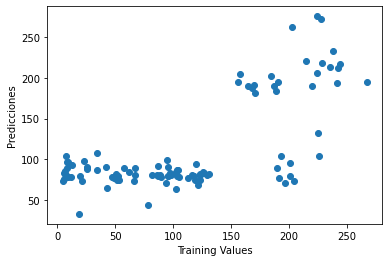

In [111]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Training Values")
plt.ylabel("Predicciones")

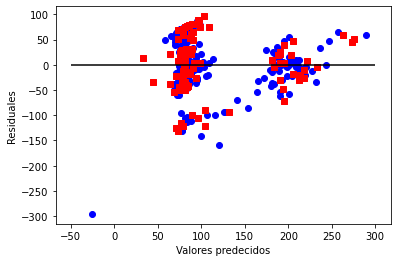

In [112]:
plt.scatter(y_train_pred, y_train_pred - y_train, color="blue", marker="o", label="Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, color="red", marker="s", label="Test data")
plt.xlabel("Valores predecidos")
plt.ylabel("Residuales")
plt.hlines(y=0, xmin=-50, xmax=300, color="black")
plt.show()

In [113]:
ln.score(X_test, y_test)

0.48688487324790186

Para mejorar el modelo, se debe hacer un "cross-validation".

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(ln, X, Y, cv=10)
scores

Vemos como mediante cross-validation se alcanza una mayor accuracy para el modelo (0.677 versus 0.48). Podemos graficar las nuevas predicciones tomando en cuentas las cross-validations:

In [ ]:
predicciones = cross_val_predict(ln, X, Y, cv=10)
plt.scatter(Y, predicciones)

Una de las métricas interesantes a medir en este modelo es el mean squared error (RMSE) y el valor r cuadradro:

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"RMSE train: {mse_train}, RMSE test: {mse_test}")
print(f"r2 train: {r2_train}, r2 test: {r2_test}")

In [ ]:
np.sqrt(mse_test)

In [ ]:
np.mean(y_test)

El valor de RMSE serviría para comparar distintos tipos de modelos predictivos, pero por si solo no nos brinda suficiente información. En un caso ideal, se hubiesen evaluado distintos tipos de modelos de predicción, pero sólo se ha hecho con una regresión lineal. Por otro lado, sólo un 50% de la varianza en los valores predecidos para el valor de la leche se pueden atribuir al resto de las variables del modelo (a partir del valor de r2). 

En cuanto al ejercicio realizado, hubiese sido interesante contar con otras variables para considerar en el modelo. Por ejemplo, y debido a las características geográficas de chile, se podría haber considerado la variable de latitud-longitud. Además, información específica sobre la industria de la leche como dimensiones de producción, también podrían haber aportado.

Este tipo de modelo de predicción tiene varios usos, específicamente en el ámbito del cambio climático podría ser utilizado para optimizar el uso de recursos naturales involucrados en la producción y distribución de los bienes básicos. No solo para la leche, pero por ejemplo para los cultivos y ganadería que son factores importantes en la contaminación global y significan un enorme uso de agua, se podrían utilizar predicciones meteorológicas para, a su vez, predecir los recursos necesarios para evitar variaciones en el precio de estos insumos y en el PIB del país. Por ejemplo, siguiendo las tendencias de disminución de precipitaciones en el territorio chileno, los recursos naturales serán cada vez menores y se podría predecir los valores de la canasta básica de acuerdo a esto.